Sustainable Land Use Classification: Based on land use, crop type, and emissions, you could classify which land use practices are likely to be more sustainable (e.g., low emissions or higher yields per area). This can guide decisions on efficient resource usage.

In [1]:
import requests  #to query the API 
import re  #regular expressions
import pandas as pd   # for dataframes
import json

import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [74]:
df = pd.read_csv("CropEffandEmLabels.csv", index_col = 0)
df

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland),Em_label,Eff_label,CL_label
0,Argentina,1961,0.9416,4.848952e+07,0.1747,5.149694e+04,Low,Mid,High
1,Argentina,1962,0.9544,4.860748e+07,0.1792,5.092989e+04,Low,Mid,High
2,Argentina,1963,0.9589,5.533947e+07,0.3471,5.771141e+04,Mid,Mid,High
3,Argentina,1964,0.9624,5.761074e+07,0.4164,5.986154e+04,Mid,Mid,High
4,Argentina,1965,0.9685,5.432264e+07,0.5205,5.608946e+04,Mid,Mid,High
...,...,...,...,...,...,...,...,...,...
862,South America,2017,0.3189,1.696150e+09,153.3090,5.318752e+06,High,High,Mid
863,South America,2018,0.3179,1.655944e+09,154.0408,5.209010e+06,High,High,Mid
864,South America,2019,0.3174,1.719963e+09,163.5284,5.418913e+06,High,High,Mid
865,South America,2020,0.3189,1.752409e+09,189.3039,5.495168e+06,High,High,Mid


1. Predict Crop Production Efficiency: Use cropland per capita, N2O emissions, country, and year to classify production efficiency as high, mid, or low.

or

2. Predict N2O Fertilizer Emissions Level: Use crop production efficiency, cropland per capita, country, and year to classify the emissions as high, mid, or low.

In [75]:
df.head()

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland),Em_label,Eff_label,CL_label
0,Argentina,1961,0.9416,48489517.56,0.1747,51496.938785,Low,Mid,High
1,Argentina,1962,0.9544,48607482.31,0.1792,50929.885069,Low,Mid,High
2,Argentina,1963,0.9589,55339474.65,0.3471,57711.413755,Mid,Mid,High
3,Argentina,1964,0.9624,57610742.18,0.4164,59861.535931,Mid,Mid,High
4,Argentina,1965,0.9685,54322641.88,0.5205,56089.459866,Mid,Mid,High


In [76]:
df.columns

Index(['Area', 'Year', 'Cropland (ha/cap)', 'Crop Prod Total (tonnes)',
       'Fertilizer N20 Emissions (kt)', 'Efficiency (kt/cropland)', 'Em_label',
       'Eff_label', 'CL_label'],
      dtype='object')

In [77]:
###across each year, how many countries had high emissions or efficiencies or cropland usage?
###

In [94]:
data = df.copy()

In [91]:


data = data.drop(columns = ['Cropland (ha/cap)', 'Crop Prod Total (tonnes)',
       'Fertilizer N20 Emissions (kt)', 'Efficiency (kt/cropland)'])
                 
df_encoded = pd.get_dummies(data, columns=['Em_label', 'Eff_label', 'CL_label'], prefix=['Em', 'Eff', 'CL'])

# Step 2: Group by 'Year' and sum the one-hot encoded columns
result_df = df_encoded.groupby('Year', as_index=False).sum()

# Step 3: Optionally, rename columns for clarity (if needed)
result_df = result_df.rename(columns={
    'Em_high': 'Em_high', 'Em_low': 'Em_low', 'Em_mid': 'Em_mid',
    'Eff_high': 'Eff_high', 'Eff_low': 'Eff_low', 'Eff_mid': 'Eff_mid',
    'CL_high': 'CL_high', 'CL_low': 'CL_low', 'CL_mid': 'CL_mid'
})

# Display the result
result_df

/tmp/ipykernel_139/725371312.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_df = df_encoded.groupby('Year', as_index=False).sum()


,Year,Em_High,Em_Low,Em_Mid,Eff_High,Eff_Low,Eff_Mid,CL_High,CL_Low,CL_Mid
0,1961,0,7,6,2,5,6,4,1,8
1,1962,0,8,5,2,5,6,4,1,8
2,1963,1,6,6,2,5,6,4,1,8
3,1964,1,5,7,2,5,6,4,1,8
4,1965,1,6,6,2,5,6,3,1,9
...,...,...,...,...,...,...,...,...,...,...
56,2017,5,1,7,6,2,5,4,5,4
57,2018,5,1,7,5,2,6,4,5,4
58,2019,5,1,7,7,2,4,4,6,3
59,2020,5,0,8,7,2,4,4,5,4


In [80]:
data = result_df.copy()

In [81]:
# Define features (X) and target (y)
X = data[['Em_High', 'Em_Low', 'Em_Mid', 'Eff_High', 'Eff_Low', 'Eff_Mid',
       'CL_High', 'CL_Low', 'CL_Mid']]
y = data[['Year']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [87]:
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

        1961       0.00      0.00      0.00       1.0
        1962       0.00      0.00      0.00       0.0
        1964       0.00      0.00      0.00       1.0
        1965       0.00      0.00      0.00       0.0
        1966       0.00      0.00      0.00       1.0
        1967       0.00      0.00      0.00       1.0
        1968       0.00      0.00      0.00       0.0
        1969       0.00      0.00      0.00       1.0
        1970       0.00      0.00      0.00       0.0
        1973       0.00      0.00      0.00       1.0
        1974       0.00      0.00      0.00       1.0
        1977       0.00      0.00      0.00       1.0
        1978       0.00      0.00      0.00       1.0
        1983       0.00      0.00      0.00       0.0
        1988       0.00      0.00      0.00       0.0
        1991       0.00      0.00      0.00       0.0
        1992       0.00      0.00      0.00

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [90]:
# Define features (X) and target (y)
X = data[['Em_High', 'Eff_Low',
       'CL_High']]
y = data[['Year']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

        1961       0.00      0.00      0.00       1.0
        1962       0.00      0.00      0.00       0.0
        1964       0.00      0.00      0.00       1.0
        1965       0.00      0.00      0.00       0.0
        1966       0.00      0.00      0.00       1.0
        1967       0.00      0.00      0.00       1.0
        1969       0.00      0.00      0.00       1.0
        1973       0.00      0.00      0.00       1.0
        1974       0.00      0.00      0.00       1.0
        1977       0.00      0.00      0.00       1.0
        1978       0.00      0.00      0.00       1.0
        1979       0.00      0.00      0.00       0.0
        1987       0.00      0.00      0.00       0.0
        1989       0.00      0.00      0.00       0.0
        1990       0.00      0.00      0.00       0.0
        1992       0.00      0.00      0.00       1.0
        1994       0.00      0.00      0.00

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-

In [ ]:
############################################################

In [118]:
############## For running Categorical NB#####################
data = df.copy()

categorical_features = ['Em_label', 'Eff_label', 'CL_label', 'Area', 'Year']

# Drop quantitative data columns from the DataFrame
# For example, if your quantitative columns are named 'Raw Cropland', 'Raw N2O Emissions', etc.
quantitative_columns = ['Efficiency (kt/cropland)', 'Cropland (ha/cap)', 'Crop Prod Total (tonnes)', "Fertilizer N20 Emissions (kt)"]  # update with actual column names
data = data.drop(columns=quantitative_columns)

# Encode categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # store encoder for each column if you need to reverse-transform
    
data

,Area,Year,Em_label,Eff_label,CL_label
0,0,0,1,2,0
1,0,1,1,2,0
2,0,2,2,2,0
3,0,3,2,2,0
4,0,4,2,2,0
...,...,...,...,...,...
862,10,56,0,0,2
863,10,57,0,0,2
864,10,58,0,0,2
865,10,59,0,0,2


In [119]:
data2 = data.copy()
for column in categorical_features:
    # Use the stored LabelEncoder for the specific column to inverse transform
    data2[column + '_original'] = label_encoders[column].inverse_transform(data[column])

# This will create a new column for each categorical feature with the original labels
data2

,Area,Year,Em_label,Eff_label,CL_label,Em_label_original,Eff_label_original,CL_label_original,Area_original,Year_original
0,0,0,1,2,0,Low,Mid,High,Argentina,1961
1,0,1,1,2,0,Low,Mid,High,Argentina,1962
2,0,2,2,2,0,Mid,Mid,High,Argentina,1963
3,0,3,2,2,0,Mid,Mid,High,Argentina,1964
4,0,4,2,2,0,Mid,Mid,High,Argentina,1965
...,...,...,...,...,...,...,...,...,...,...
862,10,56,0,0,2,High,High,Mid,South America,2017
863,10,57,0,0,2,High,High,Mid,South America,2018
864,10,58,0,0,2,High,High,Mid,South America,2019
865,10,59,0,0,2,High,High,Mid,South America,2020


In [120]:
# Define features (X) and target (y)
X = data[['Em_label', 'CL_label', "Area", "Year"]]
y = data[['Eff_label']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_nb_model = CategoricalNB()

# Train the model
cat_nb_model.fit(X_train, y_train)

y_pred = cat_nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=[1, 2, 0]))

Accuracy: 0.9151515151515152
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.98      0.82      0.89        49
           2       0.88      0.98      0.92        87

    accuracy                           0.92       165
   macro avg       0.94      0.90      0.91       165
weighted avg       0.92      0.92      0.91       165

Confusion Matrix:
 [[40  9  0]
 [ 1 85  1]
 [ 0  3 26]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
# Define features (X) and target (y)
X = data[['Em_label', 'CL_label']]
y = data['Eff_label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_nb_model = CategoricalNB()

# Train the model
cat_nb_model.fit(X_train, y_train)

y_pred = cat_nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8484848484848485
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.97      0.59      0.73        49
           2       0.79      0.98      0.87        87

    accuracy                           0.85       165
   macro avg       0.91      0.82      0.84       165
weighted avg       0.87      0.85      0.84       165

Confusion Matrix:
 [[26  0  3]
 [ 0 29 20]
 [ 1  1 85]]


In [30]:
# Define features (X) and target (y)
X = data[['Em_label', 'CL_label']]
y = data['Eff_label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_nb_model = CategoricalNB()

# Train the model
cat_nb_model.fit(X_train, y_train)

y_pred = cat_nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8484848484848485
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.97      0.59      0.73        49
           2       0.79      0.98      0.87        87

    accuracy                           0.85       165
   macro avg       0.91      0.82      0.84       165
weighted avg       0.87      0.85      0.84       165

Confusion Matrix:
 [[26  0  3]
 [ 0 29 20]
 [ 1  1 85]]


In [ ]:
#######################################################

In [65]:
data2 = df.copy()

quantitative_columns = ['Efficiency (kt/cropland)', 'Cropland (ha/cap)', 'Crop Prod Total (tonnes)']
target_column = 'Em_label'  # this is your high/mid/low label you want to predict

# Define features (X) as only the quantitative columns and target (y) as the categorical column
X = data2[quantitative_columns]
y = data2[target_column]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gaussian_nb_model = GaussianNB()

# Train the model
gaussian_nb_model.fit(X_train, y_train)

y_pred = gaussian_nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.793939393939394
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        31
           1       0.61      1.00      0.76        46
           2       0.92      0.67      0.78        88

    accuracy                           0.79       165
   macro avg       0.85      0.84      0.82       165
weighted avg       0.85      0.79      0.80       165

Confusion Matrix:
 [[26  0  5]
 [ 0 46  0]
 [ 0 29 59]]


In [66]:
X_train.head()


,Efficiency (kt/cropland),Cropland (ha/cap),Crop Prod Total (tonnes)
242,2.045189e+05,0.1103,22558436.95
751,3.027099e+04,0.3278,9922831.50
803,1.511739e+05,0.1158,17505937.25
471,7.212180e+03,0.5708,4116712.07
303,1.031667e+06,0.0792,81708042.07


In [67]:
X_test.head()

,Efficiency (kt/cropland),Cropland (ha/cap),Crop Prod Total (tonnes)
652,3.009604e+03,0.1610,4.845463e+05
176,3.857144e+06,0.3096,1.194172e+09
68,9.329666e+03,0.3697,3.449178e+06
170,2.809526e+06,0.3190,8.962388e+08
279,3.984201e+05,0.1444,5.753186e+07


In [72]:
y_train.tolist()[1:10]

[2, 2, 2, 0, 1, 1, 0, 2, 2]

In [73]:
y_test.tolist()[1:10]

[0, 1, 0, 0, 2, 0, 1, 2, 2]

GaussianNB()

Accuracy: 0.7272727272727273
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81        31
           1       0.57      0.98      0.72        46
           2       0.83      0.61      0.71        88

    accuracy                           0.73       165
   macro avg       0.80      0.76      0.74       165
weighted avg       0.79      0.73      0.73       165

Confusion Matrix:
 [[21  0 10]
 [ 0 45  1]
 [ 0 34 54]]


In [29]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)
print(MyModelNB.predict_proba(x_test))


The confusion matrix is:
[[32  9  5  0 12 27  4]
 [ 9  8  6  1  4  6  1]
 [ 5  0  2  2  2  1  1]
 [10  8  4  0  9  8  1]
 [ 5  2  4  1  5  2  1]
 [ 2  2  3  2  0  7  3]
 [ 3  1  1  0  3  6  1]]
[[0.38280881 0.1257777  0.02582993 ... 0.08325052 0.30995226 0.06825263]
 [0.05998704 0.11794859 0.17907833 ... 0.1559329  0.43484953 0.02826105]
 [0.15200584 0.00233499 0.0021271  ... 0.08334786 0.58767959 0.16112901]
 ...
 [0.29378102 0.08219673 0.21985258 ... 0.12201121 0.06037075 0.11701594]
 [0.1045114  0.17567686 0.05915846 ... 0.13047096 0.34452712 0.16727559]
 [0.07275693 0.07162234 0.06571512 ... 0.07106225 0.56405518 0.06886886]]


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

                 abcnews       0.48      0.36      0.41        89
             advocatecom       0.27      0.23      0.25        35
           breitbartnews       0.08      0.15      0.11        13
                 foxnews       0.00      0.00      0.00        40
minneapolis star tribune       0.14      0.25      0.18        20
                 nbcnews       0.12      0.37      0.18        19
        the daily caller       0.08      0.07      0.07        15

                accuracy                           0.24       231
               macro avg       0.17      0.20      0.17       231
            weighted avg       0.26      0.24      0.24       231



In [99]:
#Make a pretty confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    


The confusion matrix is:
[[26  0  3]
 [ 0 29 20]
 [ 1  1 85]]


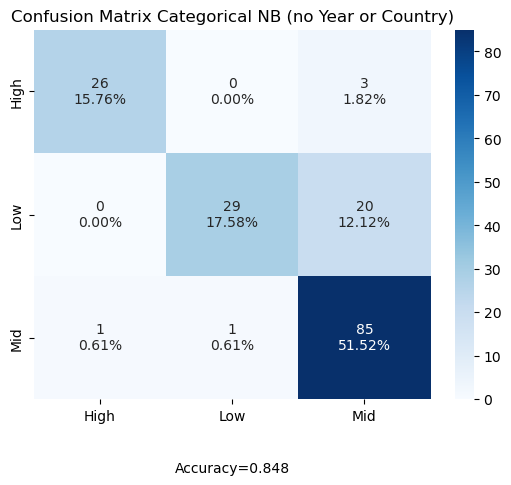

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low', 'Mid']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix Categorical NB (no Year or Country)",
                     xyplotlabels=False)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

                 abcnews       0.41      0.69      0.52        67
             advocatecom       0.21      0.21      0.21        29
           breitbartnews       0.00      0.00      0.00        14
                 foxnews       0.25      0.15      0.19        33
minneapolis star tribune       0.05      0.05      0.05        19
                 nbcnews       0.40      0.11      0.17        18
        the daily caller       0.11      0.07      0.08        15

                accuracy                           0.31       195
               macro avg       0.21      0.18      0.18       195
            weighted avg       0.27      0.31      0.27       195

